# From Gaming Giant to AI Titan: Analyzing NVIDIA’s Stock Evolution (1999–2025)

# Table of Contents

## Introduction



*   Project Overview
*  Data Source and Description


## Data Preparation

*   Data Cleaning and Type Conversion

## Exploratory Data Analysis

* Long-Term Price Trend Visualization

* Historical Trading Volume Analysis

* Monthly Average and Moving Average Calculation

* Correlation Heatmap of Stock Features

* Volume vs Returns Scatter Plot

* Rolling Volatility Analysis

* Insights and Interpretation

* Key Trends and Growth Phases

* Correlation Observations

* Volatility Patterns and Market Events

## Conclusion

* Summary of Findings

* Next Steps










# Introduction

This project explores the historical performance of NVIDIA Corporation’s stock price over a 25-year period from 1999 to 2025. The dataset includes daily trading data such as adjusted close, open, high, low prices, and trading volume, which were cleaned and converted for accurate time-based analysis. Visualizations like line plots, moving averages, correlation heatmaps, scatter plots, and rolling volatility charts were generated to understand both long-term trends and short-term fluctuations. Special attention was given to pivotal moments in NVIDIA’s history, such as the early 2000s technology boom, the 2008 financial crisis, the surge in GPU demand during the COVID-19 pandemic, and the unprecedented growth linked to AI advancements starting around 2023.

# Objectives



1. Examine the evolution of NVIDIA’s adjusted closing prices over time to identify
major growth phases and market cycles.
2.   Evaluate the relationship between trading volume, price movements, and returns to assess how investor activity correlates with price changes.

1.   Analyze the impact of market volatility through rolling standard deviations to highlight periods of elevated risk and uncertainty.
2.   Compute moving averages to smooth short-term noise and better visualize sustained trends.

1.   Investigate correlations among different stock features to understand dependencies and inform further modeling or forecasting.


# References

This dataset was downloaded from Kaggle

https://www.kaggle.com/datasets/adilshamim8/nvidia-stock-market-history

# Data Cleaning

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [4]:
#import dataset
df = pd.read_csv('NVDA (1).csv')

In [5]:
#display dataset info
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6558 non-null   object 
 1   Adj Close  6558 non-null   float64
 2   Close      6558 non-null   float64
 3   High       6558 non-null   float64
 4   Low        6558 non-null   float64
 5   Open       6558 non-null   float64
 6   Volume     6558 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 358.8+ KB


In [6]:
#data size rows=6558columns=7
df.shape

(6558, 7)

In [7]:
#Display the first 5 rows to make sure the data is right
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


In [8]:
df.dtypes

,0
Date,object
Adj Close,float64
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64


In [9]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6.558000e+03
mean,8.768532,8.795447,8.956567,8.618315,8.795850,5.991103e+08
std,23.907205,23.904882,24.349618,23.419200,23.922708,4.307236e+08
min,0.031286,0.034115,0.035547,0.033333,0.034896,1.968000e+07
25%,0.257739,0.281042,0.288511,0.273354,0.280810,3.384780e+08
50%,0.437176,0.466083,0.472875,0.459250,0.466584,5.002635e+08
75%,4.597059,4.644625,4.724000,4.588750,4.632437,7.307002e+08
max,149.429993,149.429993,153.130005,147.820007,153.029999,9.230856e+09


In [10]:
#There is no null value in this data cause basically it is a stock data and here you wont find much if a null data its all numbers
df.isnull().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [11]:
#Converted the date column to datetime for improved time-based analysis and plotting. Initially stored as object.
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

,0
Date,datetime64[ns]
Adj Close,float64
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64


In [12]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


# Long term price term

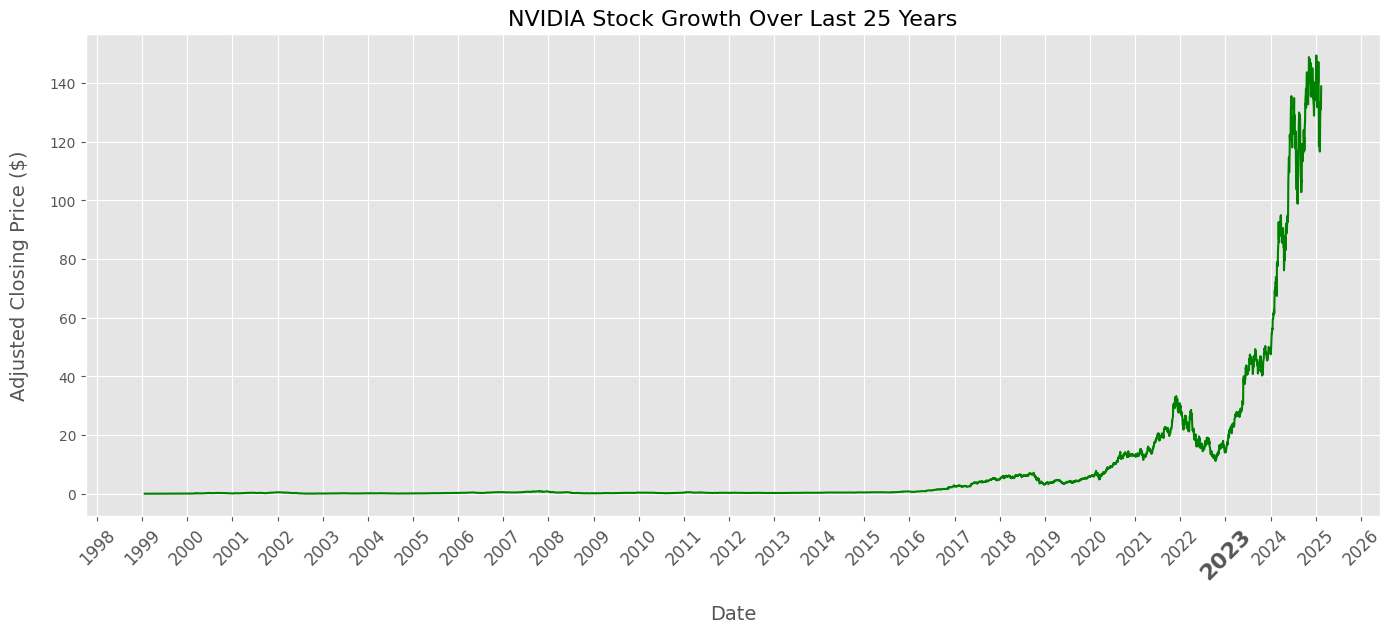

In [13]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Adj Close', data=df, color='green')
plt.title('NVIDIA Stock Growth Over Last 25 Years', fontsize=16)
plt.xlabel('Date', fontsize=14, labelpad=15)
plt.ylabel('Adjusted Closing Price ($)', fontsize=14, labelpad=15)
plt.grid(True)
plt.tight_layout()


import matplotlib.dates as mdates
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, fontsize=12)

for label in ax.get_xticklabels():
    if label.get_text() == '2023':
        label.set_fontsize(16)
        label.set_fontweight('bold')

plt.show()

A long-term price trend chart shows NVIDIA’s strong growth over 25 years, with a sharp stock rise in 2023. This surge was driven by booming demand for its GPUs due to rapid growth in AI and generative AI like ChatGPT, strong data center business growth, continued leadership in gaming GPUs, record financial results, and strategic expansions into new markets such as autonomous vehicles and edge computing.

# Historical Trading Volume Trend

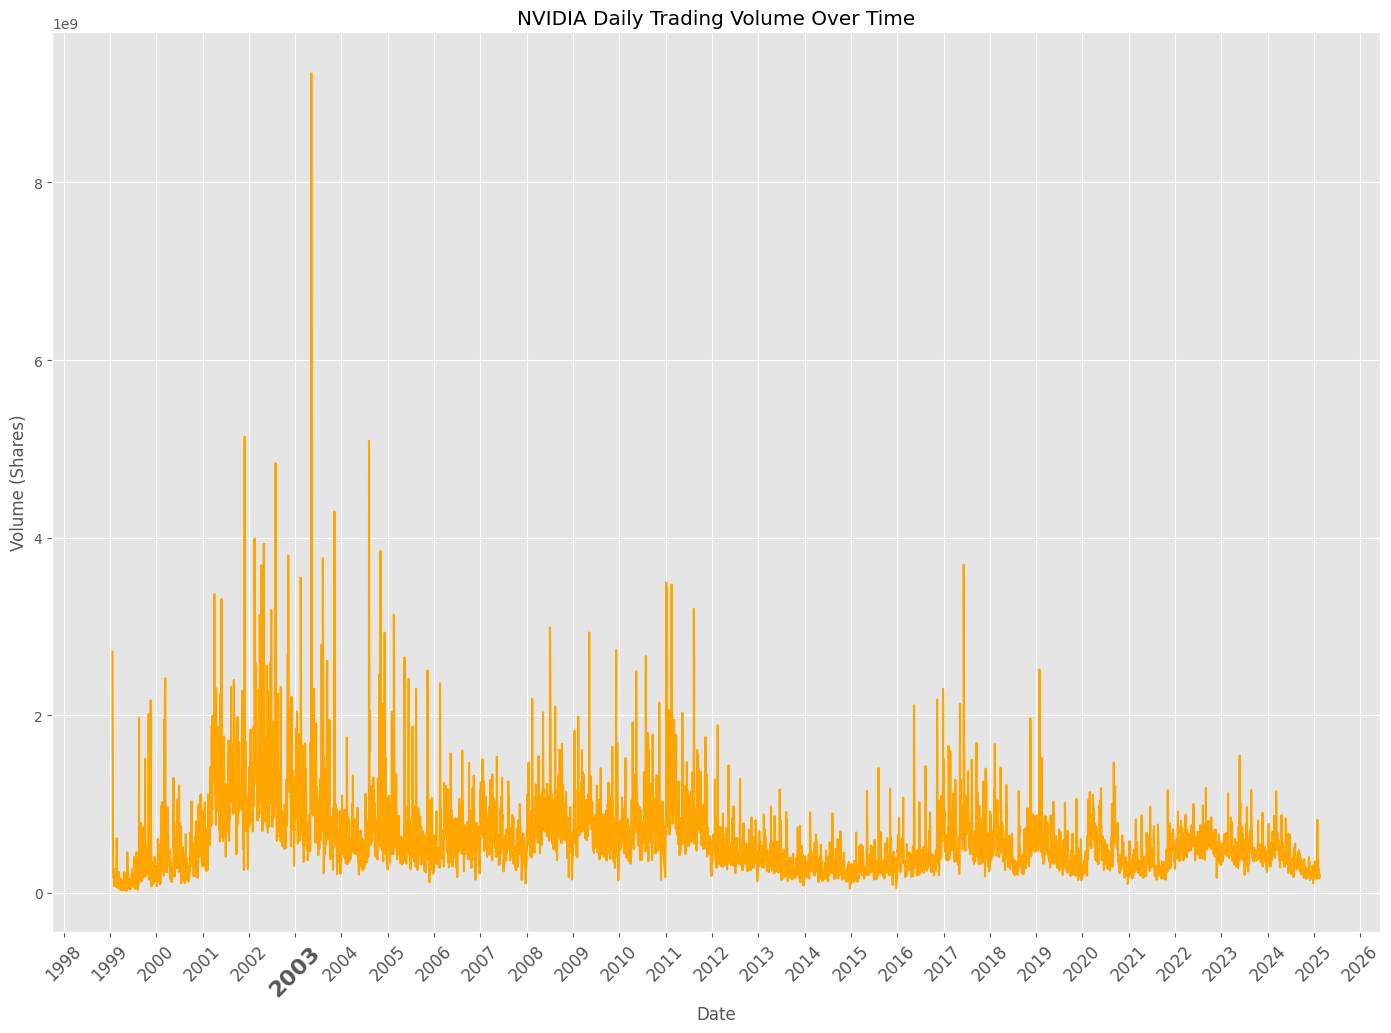

In [14]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 10))
sns.lineplot(x='Date', y='Volume', data=df, color='orange')
plt.title('NVIDIA Daily Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (Shares)')
plt.grid(True)
plt.tight_layout()

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, fontsize=12)

for label in ax.get_xticklabels():
    if label.get_text() == '2003':
        label.set_fontsize(16)
        label.set_fontweight('bold')

plt.show()

The sudden spike in NVIDIA’s trading volume around 2003 was likely due to major company developments, such as the launch of new products or technologies that attracted investor attention. Specifically, in 2003, NVIDIA introduced significant advancements in graphics technology and secured key partnerships, which boosted market interest and trading activity. This surge in volume reflects increased buying and selling as investors reacted to the company’s growth potential at that time.

In [15]:
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000


# Moving Average

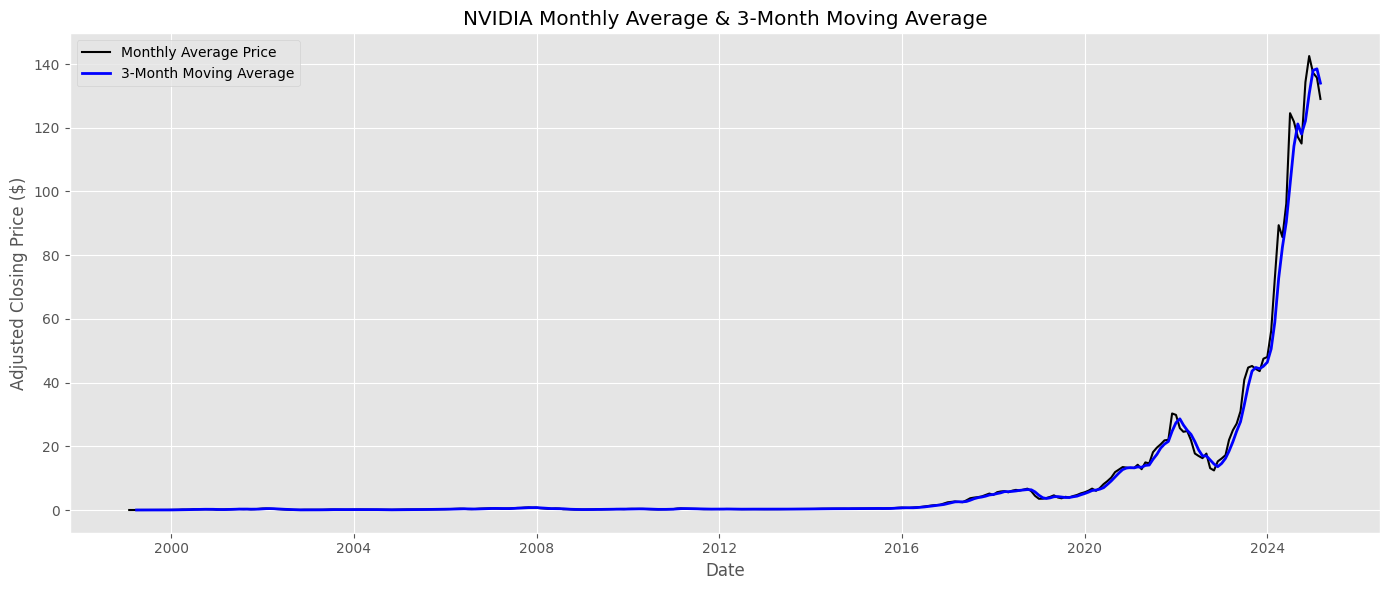

In [16]:
df.set_index('Date', inplace=True)

# Resample to monthly frequency using 'ME' (Month-End) and compute average
monthly_avg = df['Adj Close'].resample('ME').mean()

# Calculate 3-month moving average
monthly_ma = monthly_avg.rolling(window=3).mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_avg, label='Monthly Average Price', color='black')
plt.plot(monthly_ma, label='3-Month Moving Average', color='blue', linewidth=2)
plt.title('NVIDIA Monthly Average & 3-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The graph illustrates how NVIDIA’s stock price remained relatively flat and low between 1999 and around 2016, reflecting the company’s early growth period with limited market volatility. Beginning in 2016, the stock started a gradual upward trend, likely driven by NVIDIA’s expansion into gaming GPUs, data centers, and early AI applications. This growth accelerated significantly during the 2020–2021 period, coinciding with the pandemic-fueled surge in technology demand and GPU shortages. The most striking feature is the dramatic rise in price between 2023 and 2025, as NVIDIA established itself as a leader in AI hardware during the generative AI boom. The 3-month moving average smooths out short-term fluctuations and confirms that the price increase is not an isolated spike but part of a sustained upward trend. Overall, the graph highlights a clear transition from steady growth to an extraordinary phase of market momentum.

# Heatmap

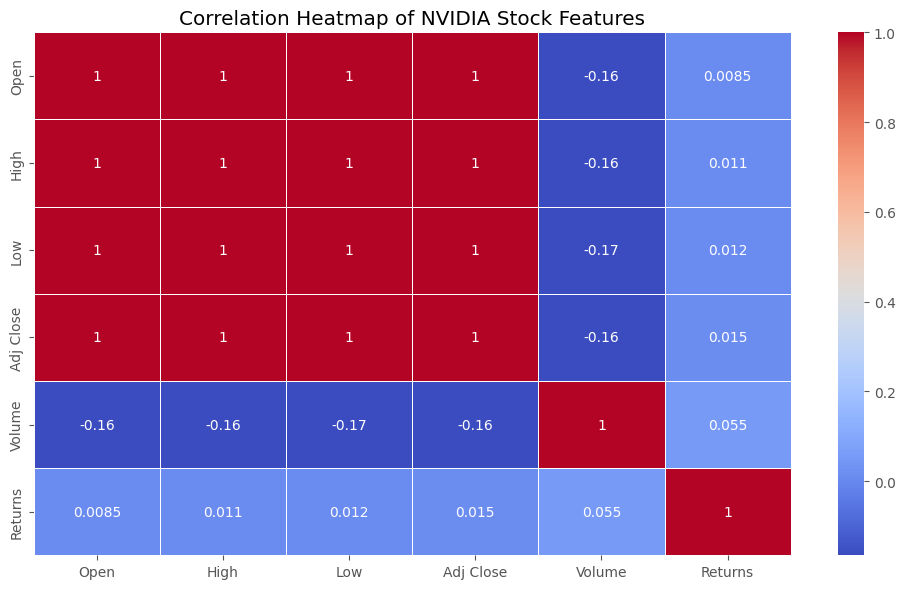

In [17]:
# Add returns for deeper insight
df['Returns'] = df['Adj Close'].pct_change()

# Compute correlation
correlation = df[['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Returns']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of NVIDIA Stock Features')
plt.tight_layout()
plt.show()

The correlation heatmap reveals a perfect positive correlation among NVIDIA’s price-related features—Open, High, Low, and Adjusted Close—indicating they move closely together. In contrast, trading volume shows a weak negative correlation with price features, suggesting that higher volume does not directly drive price increases. Returns exhibit minimal correlation with both prices and volume, highlighting their independent behavior and the need for more advanced analysis to understand return drivers.

# Volume vs Returns

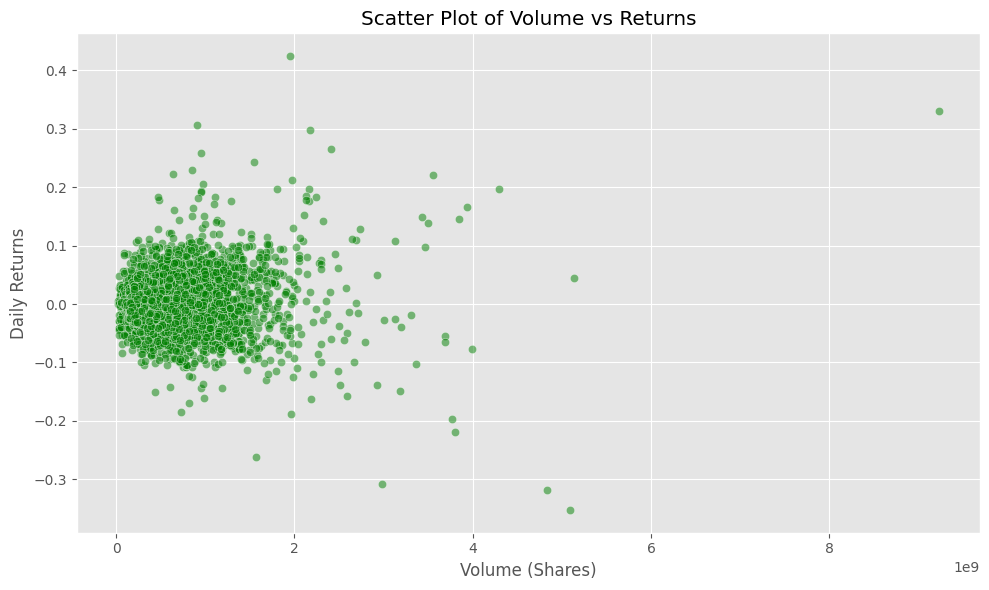

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate daily returns
df['Returns'] = df['Adj Close'].pct_change()

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Returns', data=df, alpha=0.5, color='green')
plt.title('Scatter Plot of Volume vs Returns')
plt.xlabel('Volume (Shares)')
plt.ylabel('Daily Returns')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatter plot shows that NVIDIA's daily trading volume has little to no correlation with daily returns. Most points cluster around low volume and near-zero returns, confirming that higher trading activity doesn’t consistently impact price movement.

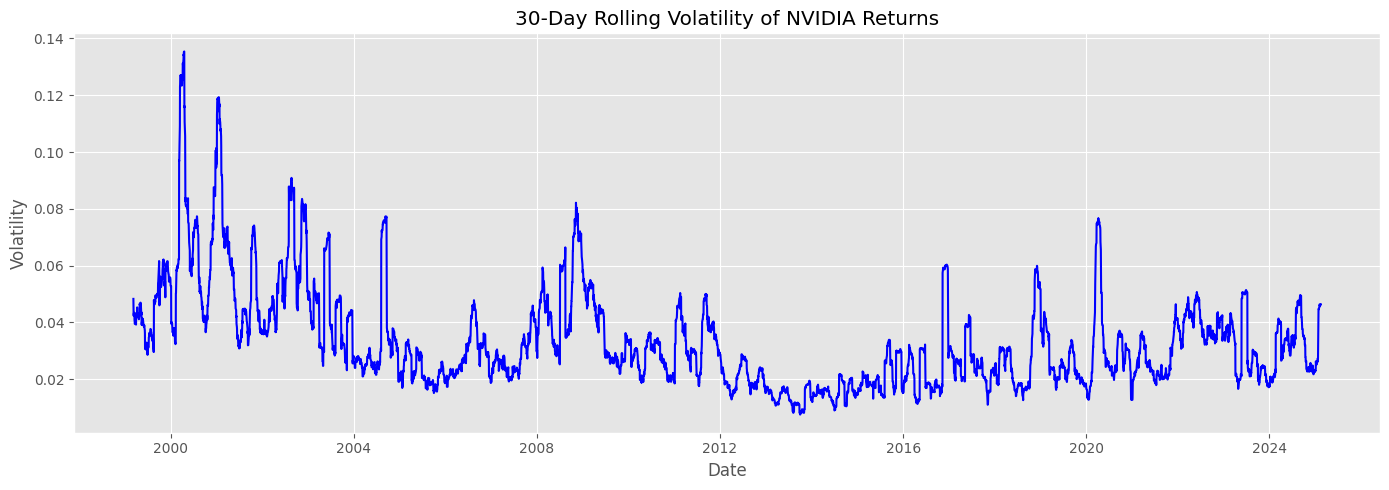

In [19]:
df['Returns'] = df['Adj Close'].pct_change()
df['Volatility'] = df['Returns'].rolling(window=30).std()  # 30-day volatility

plt.figure(figsize=(14, 5))
plt.plot(df['Volatility'], color='blue')
plt.title('30-Day Rolling Volatility of NVIDIA Returns')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.tight_layout()
plt.show()

This plot shows the 30-day rolling volatility of NVIDIA's daily returns over time. Noticeable spikes appear during major market events (e.g., early 2000s tech crash, 2008 financial crisis, COVID-19 in 2020), indicating periods of higher risk and price fluctuation. Lower flat regions suggest stable or less volatile phases. The volatility pattern helps understand how risky the stock was at different points and highlights the impact of macro events on NVIDIA's behavior.

# Conclusion

The analysis shows that NVIDIA’s stock price remained relatively stable and low until approximately 2016, when it began a steady climb, fueled by growth in gaming GPUs and emerging AI applications. A significant acceleration in price occurred between 2020 and 2021 as the pandemic increased demand for GPUs, followed by an extraordinary surge starting in 2023 driven by NVIDIA’s leadership in generative AI and data center technologies. Correlation analysis confirmed strong relationships among price features but little direct connection between trading volume and daily returns. The rolling volatility plots revealed how major macroeconomic and sector-specific events such as the dot-com bubble, the 2008 crisis, and COVID-19 caused pronounced spikes in risk. Overall, this exploratory analysis underscores NVIDIA’s transformation from a niche graphics card manufacturer into a dominant force in AI hardware, as reflected in its market capitalization and stock performance over the past quarter-century.